# Лабараторная работа 1

#### Вариант: 18

In [47]:
import numpy as np
import matplotlib.pyplot as plt

# Задача 1.1

### 1. Аналитическое решение


#### Дан ряд:
$$
 \sum_{n=0}^{\infty} \dfrac{24}{n^2 + 4n + 3}
$$


 



$$\begin{align*}
S_N &= \sum_{n=0}^{N} \dfrac{24}{n^2 + 4n + 3} = \sum_{n=0}^{N} \dfrac{24}{(n+1)(n+3)} = \sum_{n=0}^{N} \left( \dfrac{24}{n+1} - \dfrac{24}{n+3} \right)   =  24 \left[ \left( \dfrac{1}{1} - \dfrac{1}{3} \right) + \left( \dfrac{1}{2} - \dfrac{1}{4} \right) + \left( \dfrac{1}{3} - \dfrac{1}{5} \right) + \cdots + \left( \dfrac{1}{N+1} - \dfrac{1}{N+3} \right) \right] = \\
&= 24 \left[ \dfrac{1}{1} + \dfrac{1}{2} - \dfrac{1}{N+1} - \dfrac{1}{N+2} - \dfrac{1}{N+3} \right] = 18 - \dfrac{24}{N+1} - \dfrac{24}{N+2} - \dfrac{24}{N+3}
\end{align*}
$$
$$
S = \lim_{N \to +\infty} S_n = \lim_{N \to +\infty} \left( 18 - \dfrac{24}{N+1} - \dfrac{24}{N+2} - \dfrac{24}{N+3} \right) = 18
$$

#### ОТВЕТ:
$$
  \sum_{n=0}^{\infty} \dfrac{24}{n^2 + 4n + 3} = 18
$$   

### 2. N-ая сумма

In [48]:
def S(n):
    return 24/(n**2 + 4*n + 3)

def series_sum(a, b):
    result = 0
    for i in range(a, b+1):
        result += S(i)
    return result

In [49]:
Ns = [10, 100, 1000, 10000, 100000]
vals = {}
for N in Ns:
    summ = series_sum(0, N)
    vals[N] = summ
    print(f"Series sum for {N}: {summ:.6f}")

Series sum for 10: 16.076923
Series sum for 100: 17.765848
Series sum for 1000: 17.976060
Series sum for 10000: 17.997601
Series sum for 100000: 17.999760


### 3. Верные цифры, абсолютная погрешность

In [50]:
def get_abs_error(s, s_n):
    return abs(s - s_n)
    
def get_correct_nums(s, s_n):
    ae = get_abs_error(s, s_n)
    result = 0

    significant = False
    power = len(str(s_n).split(".")[0]) - 1
    for i, s in enumerate(str(s_n)):
        if s == ".":
            continue
        if s != "0":
            significant = True

        if ae <= 10**(power):
            if significant:
                result += 1
        else:
            break
            
            
        power -= 1
    return result

In [51]:
s = 18
for N in Ns:
    s_n = vals[N]
    ae = get_abs_error(s, s_n)
    corr_nums = get_correct_nums(s, s_n)
    print(f"N-{N}, S_n: {s_n}, absolute error: {ae:.6f}, corrent nums: {corr_nums}")

N-10, S_n: 16.076923076923077, absolute error: 1.923077, corrent nums: 1
N-100, S_n: 17.765848086807527, absolute error: 0.234152, corrent nums: 2
N-1000, S_n: 17.976059844418884, absolute error: 0.023940, corrent nums: 3
N-10000, S_n: 17.997600599844294, absolute error: 0.002399, corrent nums: 4
N-100000, S_n: 17.999760006000702, absolute error: 0.000240, corrent nums: 5


### 4. График

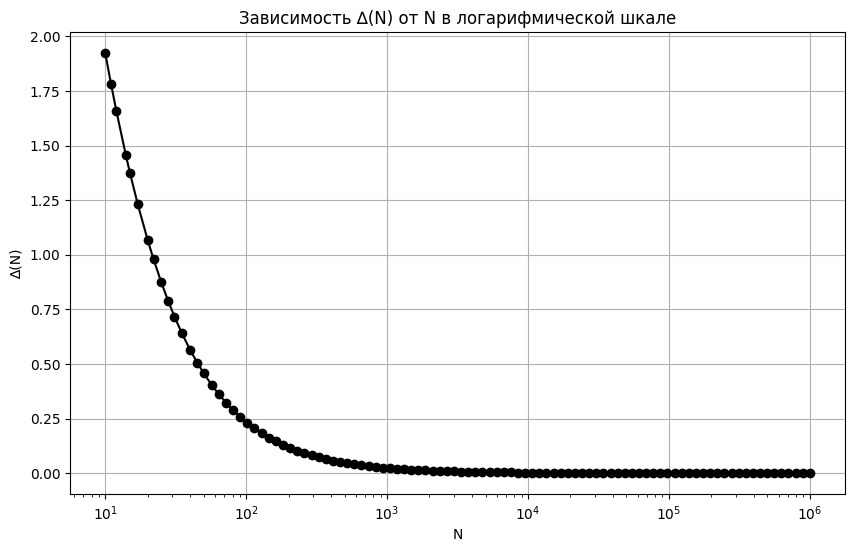

In [52]:
N_values = np.logspace(1, 6, num=100, dtype=int) 


delta_values = [get_abs_error(s, series_sum(0, N)) for N in N_values]

plt.figure(figsize=(10, 6))
plt.plot(N_values, delta_values, marker='o', linestyle='-', color='black')

plt.xscale('log') 
plt.yscale('linear') 

plt.xlabel('N')
plt.ylabel('∆(N)')
plt.title('Зависимость ∆(N) от N в логарифмической шкале')
plt.grid(True)
plt.show()

# Задача 1.2

### 1. Корень

#### Дано:

$$
f(x) = 48.75 - 14.5^{*} \sqrt[3]{x}, \quad f(x) = 0
$$

$$
 48.75 - 14.5 \sqrt[3]{x} = 0
$$

$$
x^{*} = x = \left( \dfrac{48.75}{14.5} \right)^{3} = 38.00317253679938...
$$


In [53]:
(48.75 / (14.5))**3

38.00317253679938

### 2. Теоретическая оценка погрешности

#### Входной коэффициент:  
$$
\alpha = 14.5
$$

#### Представим функцию  
$$
x = f(\alpha) = \left( \dfrac{48.75}{\alpha} \right)^3
$$

$$
f'(\alpha) = \dfrac{-347572.265625}{\alpha^4}
$$

$$
\alpha^{*} = 14.5, \quad \overline{\Delta \alpha^{*}} = 0.05
$$

#### Так как:  
$$
\overline{\Delta (y^{*})} \approx \left| f'(x^{*}) \right| \overline{\Delta (x^{*})}
$$

$$
\delta (x^{*}) = \dfrac{\Delta (x^{*})}{|x^{*}|}, \quad \overline{\delta (y^{*})} \approx \dfrac{|f'(x^{*})||x^{*}|}{|f(x^{*})|} \overline{\delta (x^{*})}
$$

#### В данном случае:  
$$
\overline{\Delta (x^{*})} = \left| \dfrac{-347572.265625}{\alpha^4} \right| \overline{\Delta (\alpha^{*})} = \dfrac {347572.265625}{14.5^{4}} \cdot 0.05 = 0.39313626762206255...
$$


In [54]:
347572.265625 / (14.5**4) * 0.05

0.39313626762206255

### 3. Поиск корня при иных коэффициентах в пределах погрешности


$$
\alpha_1 = 14.5 + 0.05 = 14.55
$$

$$
x_1 = f(\alpha_1) = 37.612732051895904
$$

In [55]:
(48.75 / 14.55) ** 3

37.612732051895904


$$
\alpha_2 = 14.5 - 0.05 = 14.45
$$

$$
x_2 = f(a_2) = 38.399035752109086
$$

In [56]:
(48.75 / 14.45) ** 3

38.399035752109086

### 4. Сравниваем резуультаты

$$
\overline{\Delta (x_1)} = \left| x^{*} - x_1 \right| = 0.39044048490347905
$$

In [57]:
abs(38.00317253679938 - 37.612732051895904)

0.39044048490347905

$$
\overline{\Delta (x_2)} = \left| x^{*} - x_2 \right| = 0.3958632153097028
$$

In [58]:
abs(38.00317253679938 - 38.399035752109086)

0.3958632153097028

$$
\overline{\Delta (x^{*})} = 0.39313626762206255 
$$
$$
\overline{\Delta (x_2)} = 0.3958632153097028 
$$
$$
\overline{\Delta (x_1)} = 0.39044048490347905 
$$
#### Получили хорошее соответсвие с теоретической оценкой

### 5. Число обусловленности задачи

#### Абсолютное 
$$
v_\Delta = \left|f'(\alpha)\right| = \dfrac{347572.265625}{14.5^4} = 7.862725352441251
$$

In [59]:
347572.265625 / (14.5)**4

7.862725352441251

#### Относительное
$$
v_\delta = \dfrac { \left|f'(\alpha)\right| \cdot \left|\alpha\right|}{\left|f(\alpha)\right|} = 2.9999999999999996
$$

In [60]:
abs(347572.265625 / (14.5)**4 * 14.5) / abs((48.75 / 14.5) ** 3)

2.9999999999999996

# Задача 1.3

In [61]:
result = 1
while result / 2 != 0:
    result /=2
print(f'Машинный ноль: {result}')

Машинный ноль: 5e-324


In [62]:
result = 1.0
b_inf = 2.0
while b_inf * 2.0 != b_inf:
    b_inf *= 2.0
    result *= 2.0
print(f'Машинная бесконечность: {result}')

Машинная бесконечность: 8.98846567431158e+307


In [63]:
result = 1;
while 1 + result / 2 != 1 :
    result /= 2
print(f'Машинный эпсилон: {result}')

Машинный эпсилон: 2.220446049250313e-16
